In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import re
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/IMDB_dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
import nltk
import subprocess


try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
lm = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
df = df.sample(5000, random_state=42)

In [ ]:
df = df.dropna()


In [ ]:
def transform_data(review):
    review = review.lower()
    review = re.sub('^a-zA-Z0-9', ' ', review)
    review = re.sub('<.*?>', ' ', review)
    review = "".join([x for x in review if x not in string.punctuation])
    review = review.split()
    review = [lm.lemmatize(x) for x in review if x not in stop_words]
    review = " ".join(review)
    return review


tranformed_rev = df.review.apply(transform_data)

In [ ]:
df.head()

,review,sentiment
33553,I really liked this Summerslam due to the look...,positive
9427,Not many television shows appeal to quite as m...,positive
199,The film quickly gets to a major chase scene w...,negative
12447,Jane Austen would definitely approve of this o...,positive
39489,Expectations were somewhat high for me when I ...,negative


In [ ]:
tranformed_rev


33553    really liked summerslam due look arena curtain...
9427     many television show appeal quite many differe...
199      film quickly get major chase scene ever increa...
12447    jane austen would definitely approve one gwyne...
39489    expectation somewhat high went see movie thoug...
                               ...                        
39885    one eastwoods best movie separated western goo...
17566    blurred childhood memory kept echo cult serie ...
16062    love zombiemovies love amateurproductions meat...
48445    chan new york get involved attempt sabotage ne...
20382    wife thought film watereddown madefortv bbc ve...
Name: review, Length: 5000, dtype: object

In [ ]:
transformed_data = pd.DataFrame({
    "t_rev": tranformed_rev,
    "sentiment": df['sentiment']
})
transformed_data.head()

,t_rev,sentiment
33553,really liked summerslam due look arena curtain...,positive
9427,many television show appeal quite many differe...,positive
199,film quickly get major chase scene ever increa...,negative
12447,jane austen would definitely approve one gwyne...,positive
39489,expectation somewhat high went see movie thoug...,negative


In [ ]:
tokens = str(
    list(transformed_data[transformed_data.sentiment == 'positive'].t_rev)
).split()




In [ ]:
pos_words = (" ").join(tokens)

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(height=800, width=1200).generate(pos_words)

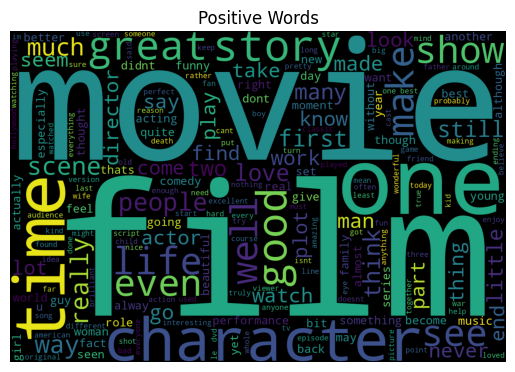

In [ ]:
plt.imshow(wc)
plt.title("Positive Words")
plt.axis("off")
plt.show()

In [ ]:
positive_words_frequency = Counter(tokens)


In [ ]:
ps_f = positive_words_frequency.most_common(30)


In [ ]:
data = pd.DataFrame(
    ps_f,srttin
    columns=['word', 'freq']
).sort_values('freq', ascending=False)


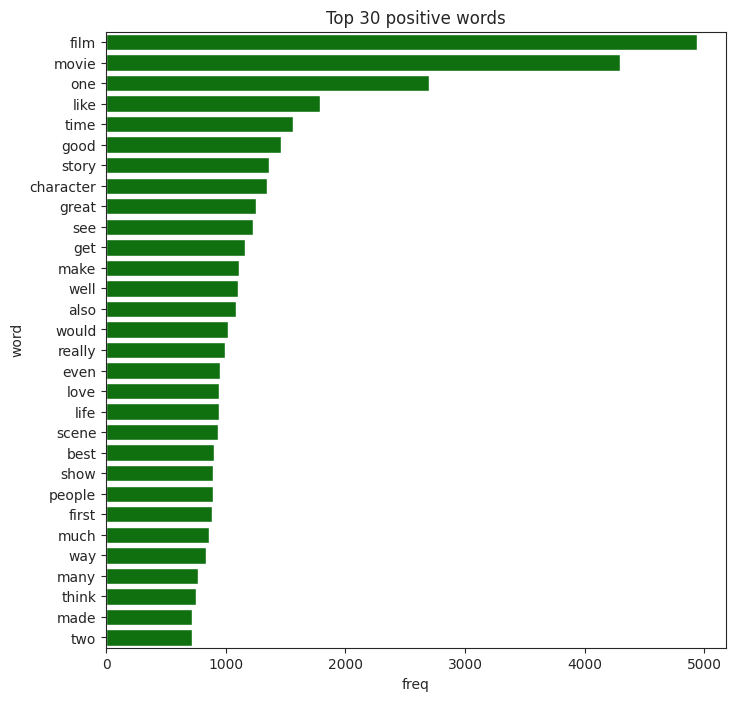

In [ ]:
plt.figure(figsize=(8, 8))
sns.set_style("ticks")
sns.barplot(x="freq", y='word', data=data, color='g').set(
    title='Top 30 positive words')

plt.show()

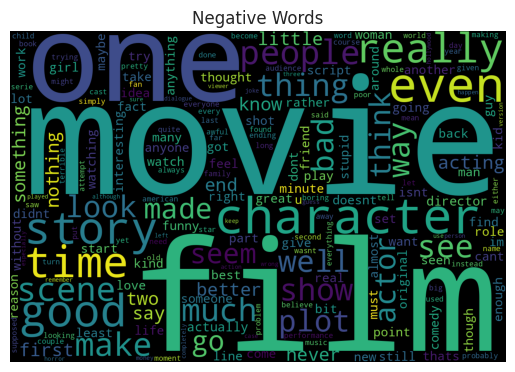

In [ ]:
tokens = str(
    list(transformed_data[transformed_data.sentiment == 'negative'].t_rev)
).split()
neg_words = (" ").join(tokens)
wc = WordCloud(height=800, width=1200).generate(neg_words)
plt.imshow(wc)
plt.title("Negative Words")
plt.axis("off")
plt.show()

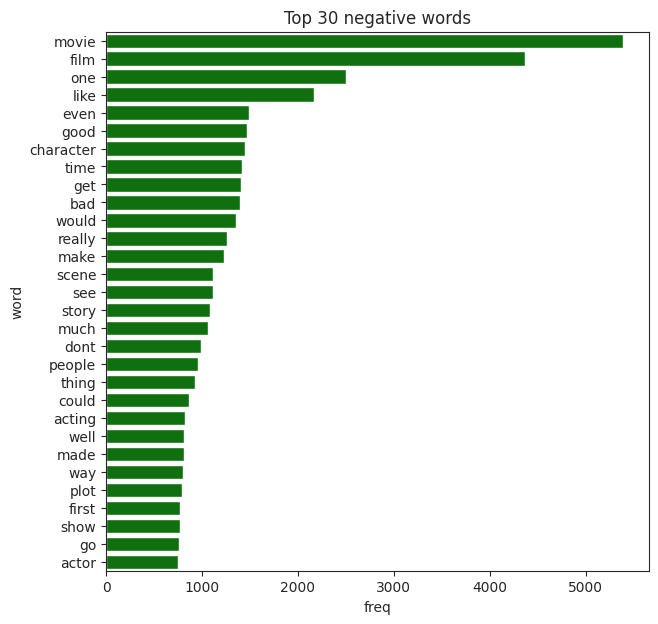

In [ ]:
negative_words_frequency = Counter(tokens)
neg_f = negative_words_frequency.most_common(30)
data = pd.DataFrame(
    neg_f,
    columns=['word', 'freq']
).sort_values('freq', ascending=False)
plt.figure(figsize=(7, 7))

sns.barplot(
    x="freq",
    y='word',
    data=data,
    color='g'
).set(title='Top 30 negative words')

plt.show()

In [ ]:
tf = TfidfVectorizer()
cv = CountVectorizer()
lb = LabelEncoder()
X = tf.fit_transform(tranformed_rev).toarray()
y = lb.fit_transform(df.sentiment)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

lr done....
rf done....
gs done....
knn done....
xgb done....


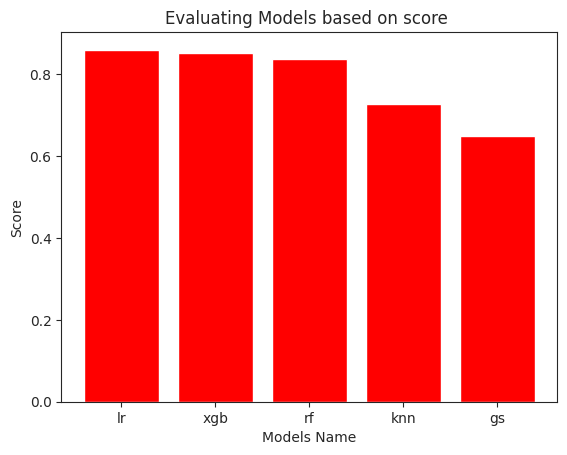

In [ ]:
models = {'lr': LogisticRegression(),
          'rf': RandomForestClassifier(),
          'gs': GaussianNB(),
          'knn': KNeighborsClassifier(),
          'xgb': XGBClassifier()
          }
# train dataset fit and predict output
def fit_predict(models, X_train, y_trian, X_test, y_test):
    y_pred = []
    models_name = []
    for model_name, model_obj in models.items():
        model_obj.fit(X_train, y_trian)
        print(f'{model_name} done....')
        y_pred.append(model_obj.predict(X_test))
        models_name.append(model_name)
    return y_pred, models_name

# Accuracy function
def get_score(y_pred, y_test):
    score = [accuracy_score(y_test, y) for y in y_pred]
    return score
y_pred, models_name = fit_predict(models, X_train, y_train, X_test, y_test)

score = get_score(y_pred, y_test)
md_scores = pd.DataFrame({'models': models_name, 'score': score}).sort_values(
    "score", ascending=False)
plt.bar('models', 'score', color='red', data=md_scores)
plt.title('Evaluating Models based on score ')
plt.xlabel('Models Name')
plt.ylabel('Score')
plt.show()

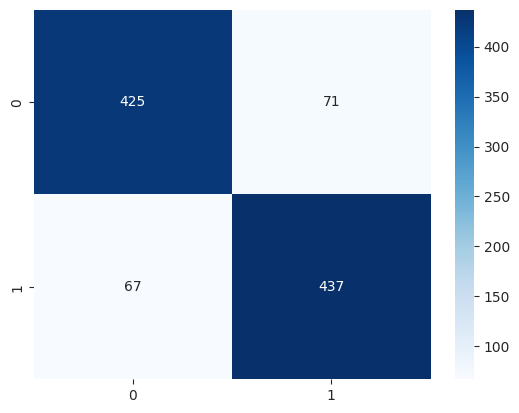

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       496
           1       0.86      0.87      0.86       504

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



In [ ]:
lr = LogisticRegression(C=14, penalty='l2', solver='newton-cg', max_iter=800, random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.show()

print(classification_report(y_test, y_pred))